In [170]:
using Plots
using ForwardDiff

In [171]:
function sample!(x,θ)
    T = size(θ,2)
    for t = 1:T-1
        x[t+1] = x[t] + ( rand() < θ[x[t] + T, t] ? 1 : -1 )
    end
end

sample! (generic function with 1 method)

In [268]:
function logqt(x,θt,t)
    return log((x[t+1] - x[t]) == 1 ? θt[x[t] + T] : 1 - θt[x[t] + T])
end

function logQ(x,θ)
    T = size(θ,2)
    s = 0
    for t = 1:T-1
        s += logqt(x,θ[:,t],t) 
    end
    return s
end

function isok(x)
    return 3 <= abs(x[end]) <= 6 
end

function logO(x)
    if 3 <= abs(x[end]) <= 6 
        return 0
    else
        return -100
    end
end

logO (generic function with 1 method)

In [269]:
function gradient!(dθ, x, θ)
    T = size(θ,2)
    for t = 1:T-1
        ForwardDiff.gradient!((@view dθ[:,t]), θt -> logqt(x,θt,t), θ[:,t])
    end
end

gradient! (generic function with 1 method)

In [283]:
function descend!(θ, θp, θmin, θmax; numsamples=10^4, η=0.1)
    N, T = size(θ)
    dθ = zero(θ)
    x = zeros(Int, T)
    
    Dθ = zero(θ)
    avF = 0    
    for s = 1:numsamples
        sample!(x, θ)
        F = logQ(x,θ) - logO(x)
        avF += F
        gradient!(dθ, x, θ)
        Dθ .+= F .* dθ ./ numsamples
    end
    θ .-= sign.(Dθ) .* abs.(θ) .* η
    θ .= clamp.(θ, θmin, θmax)
    return avF / numsamples
end

descend! (generic function with 1 method)

In [284]:
T = 25 #total time of movement
N = 2T - 1

θ = fill(0.5,N,T); 
#This is an N x T matrix where θ[i,t] represents 
#the probability of jumping to right at time t for particle i
#The prob of jumping to left is 1-θ[i,t]
dθ = fill(1/2,N,T); 

θp = fill(1/2,N,T); 

x = zeros(Int,T);

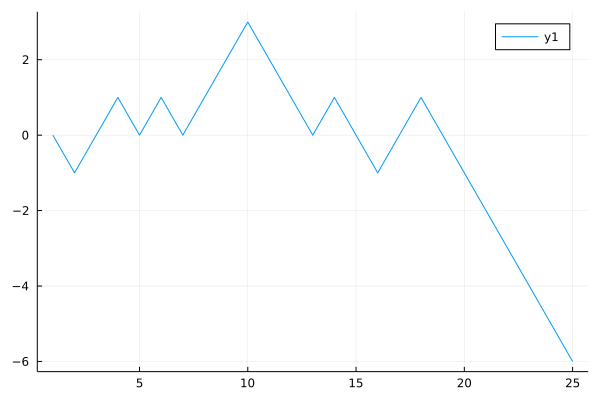

In [285]:
sample!(x,θ)

plot(x)

In [299]:
avF = descend!(θ, θp, 1e-4, 1-1e-4; numsamples=100, η=0.2)

-8.911781503372397

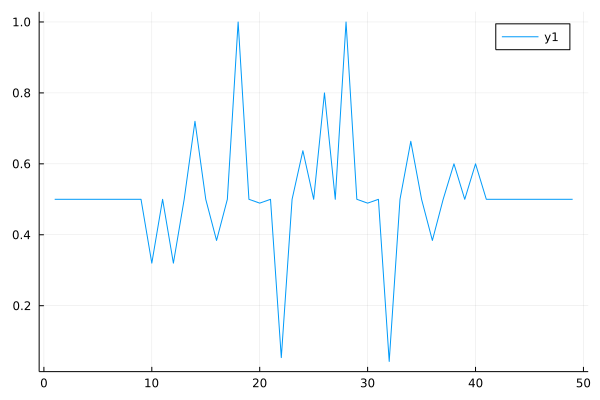

In [300]:
plot(θ[:,end-1])

In [301]:
logQ(x,θ)

-11.1879602764194

In [320]:
sample!(x,θ)
isok(x)

true

In [236]:
θ

49×25 Matrix{Float64}:
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.5       0.5       0.5       0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5       0.5       0.5       0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5       0.5       0.5       0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5       0.5       0.6       0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5       0.48      0.5       0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.576     0.5       0.663552  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5       0.614339  0.5       0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.407686  0.5       0.489224  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.5       0.489224  0.5       0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.251633  0.5       0.326149  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  …  0.5       0.115964  0.5       0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5     0.587068  0.5       0.587068  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  